# Matplotlib Finance

The data we consider for using the matplotlib finance Api is a Pandas DataFrame object containing Open, High, Low and Close data, with a Pandas DatetimeIndex.
<br>
We are considering the data of Happiest Minds Limited wthe columns Open, High, Low, Close (OHLC)

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('Happiestmind.csv')

In [3]:
df.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2010-01-04,266.200012,264.100006,264.799988,264.700012,668858.0,213.283829
1,2010-01-05,266.399994,262.500000,265.750000,263.850006,1392726.0,212.598969
2,2010-01-06,266.000000,262.600006,264.750000,265.350006,1682107.0,213.807587
3,2010-01-07,267.250000,264.149994,265.100006,264.799988,2723548.0,213.364426
4,2010-01-08,267.000000,264.149994,265.100006,265.950012,4000986.0,214.291046


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2971 entries, 0 to 2970
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2971 non-null   object 
 1   High       2971 non-null   float64
 2   Low        2971 non-null   float64
 3   Open       2971 non-null   float64
 4   Close      2971 non-null   float64
 5   Volume     2971 non-null   float64
 6   Adj Close  2971 non-null   float64
dtypes: float64(6), object(1)
memory usage: 162.6+ KB


As the **Date** column is in object format and not in datetime format. In the next step we will convert it into date time format, which is rquired for the mplfinance library

In [6]:
df["Date"] = df["Date"].astype("datetime64")

Now we will set the **Date** column as the index of the data frame, which is also a rquirement of the mplfinance library

In [7]:
df=df.set_index('Date')

In [8]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,266.200012,264.100006,264.799988,264.700012,668858.0,213.283829
2010-01-05,266.399994,262.500000,265.750000,263.850006,1392726.0,212.598969
2010-01-06,266.000000,262.600006,264.750000,265.350006,1682107.0,213.807587
2010-01-07,267.250000,264.149994,265.100006,264.799988,2723548.0,213.364426
2010-01-08,267.000000,264.149994,265.100006,265.950012,4000986.0,214.291046


Ploting with the use of mplfinance library

In [9]:
import mplfinance as mpf

After importing mplfinance, we can simply plot the OHLC data  y calling the mpf.plot() on the dataframe

C:\My installs\anaconda\lib\site-packages\mplfinance\_arg_validators.py:35: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


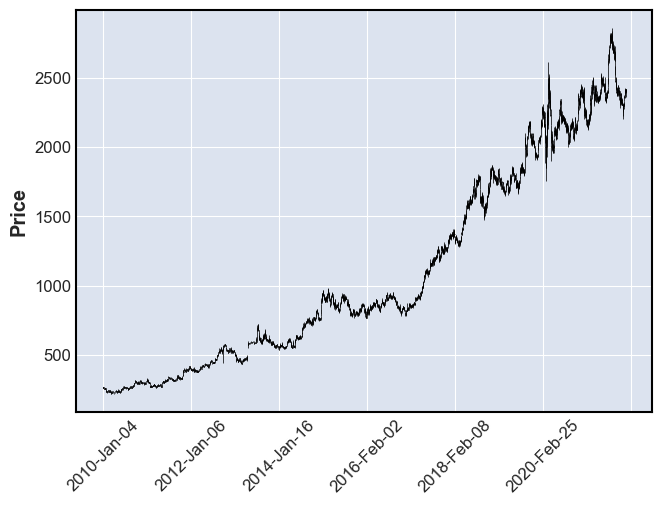

In [10]:
mpf.plot(df)

The default plot type, which we have plotetd above is ohlc.
<br>
However, other types of plots are avaiable withing the libraray. For other plot types we have to specify the keyword with the argument type.
<br>
For example, type='candle', type='line', type='renko', or type='pnf'

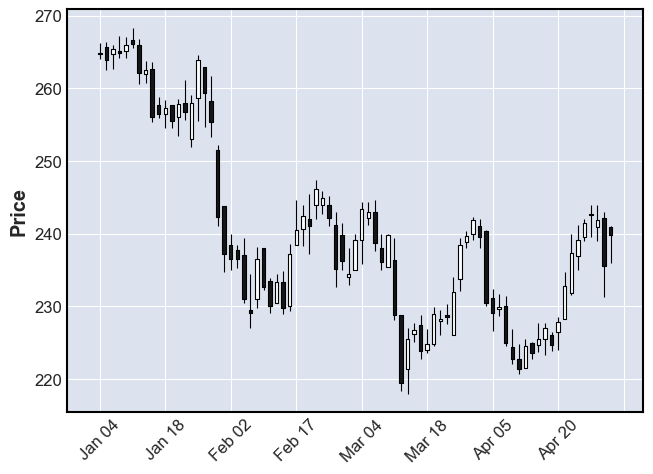

In [36]:
mpf.plot(df['2010-01':'2010-04'],type='candle')

*The above is a candle chart*

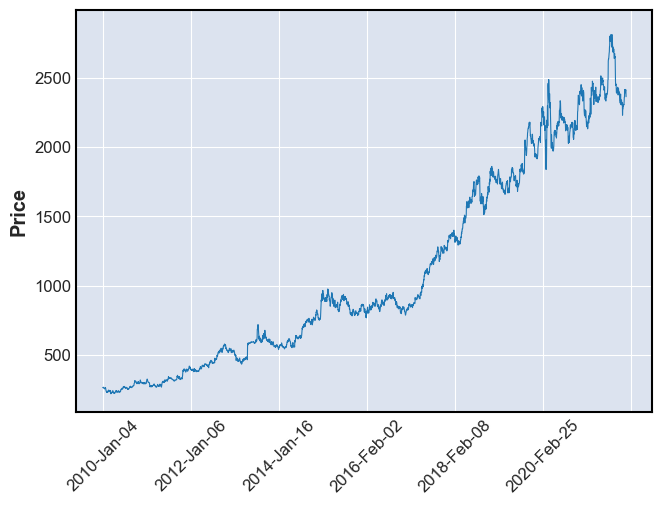

In [12]:
mpf.plot(df,type='line')

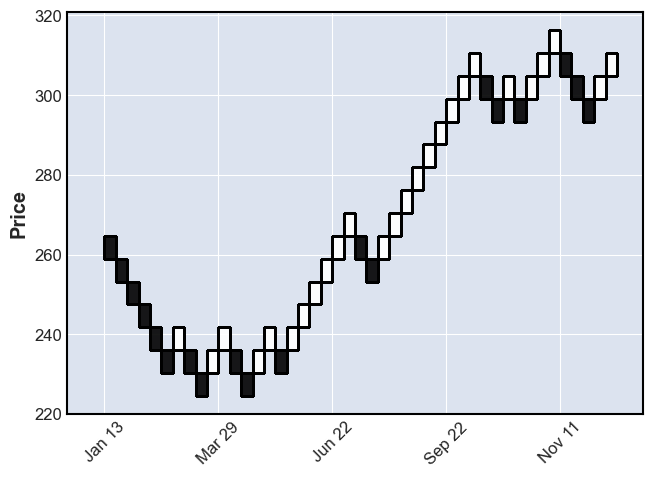

In [14]:
mpf.plot(df['2010-01':'2010-12'],type='renko')

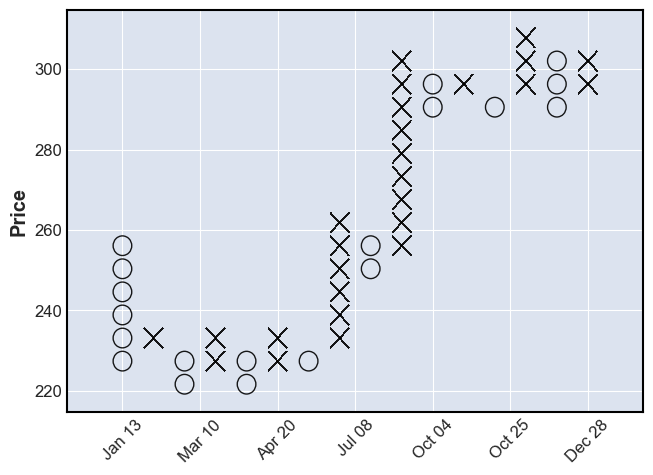

In [15]:
mpf.plot(df['2010-01':'2010-12'],type='pnf')

We can also plot moving averages with the **mav** keyword.
<br>
The **moving average** is calculated by adding a stock's prices over a certain period and dividing the sum by the total number of periods

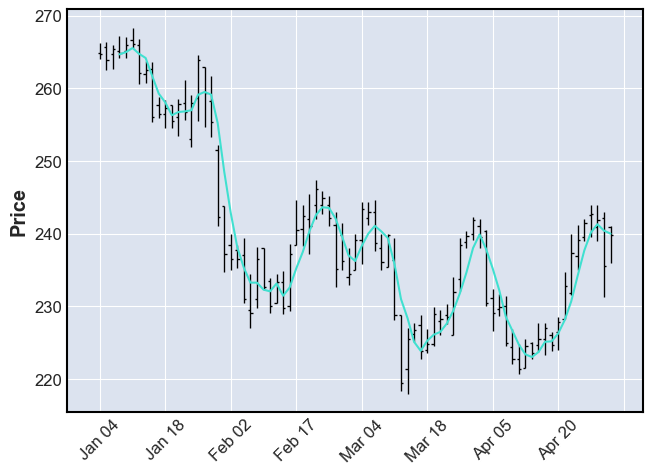

In [21]:
mpf.plot(df['2010-01':'2010-04'],type='ohlc',mav=4)

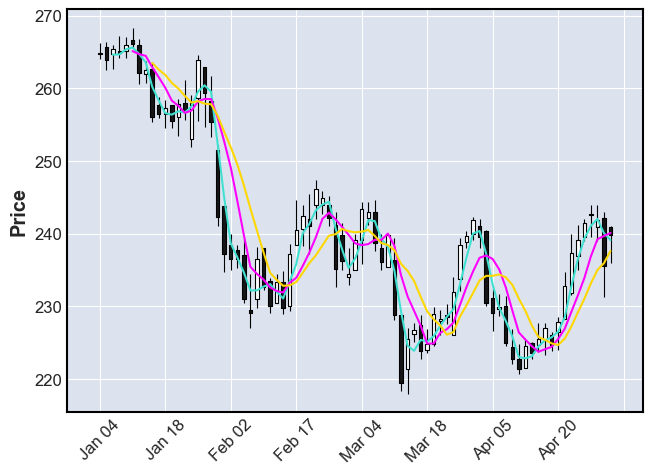

In [22]:
mpf.plot(df['2010-01':'2010-04'],type='candle',mav=(3,6,9))

In addition to the  moving average, we can also plot the **traded volume**

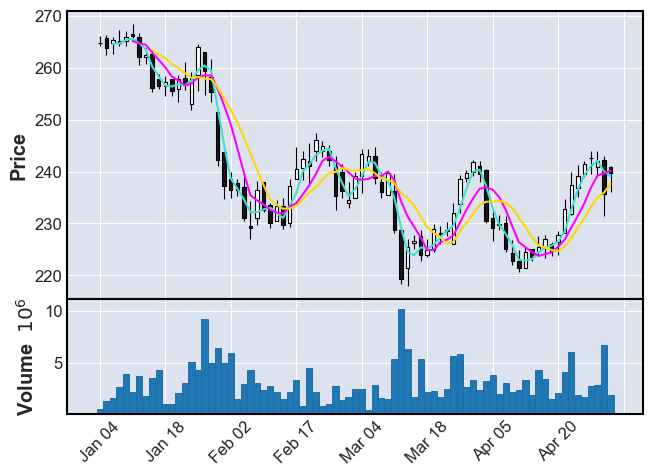

In [23]:
mpf.plot(df['2010-01':'2010-04'],type='candle',mav=(3,6,9),volume=True)

In all of the above chart, there are no gaps along the x-coordinate, however there are days on which there was no trading, which are known as Non-trading days. The non trading days are not shown as there are no prices for non trading days.
<br>
We can see the non trading days as gaps, to help us tell, where the weekends and holidays fall.
<br>
<br>
Non-trading days can be displayed with the **show_nontrading keyword**
<br>
**show_nontrading=False** is the default value and will show only dates/datetimes that have actual rows in the data.

C:\Users\Asus\AppData\Local\Temp/ipykernel_480/395314973.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(df['2010-01'],type='candle',mav=(3,6,9),volume=True,show_nontrading=True)


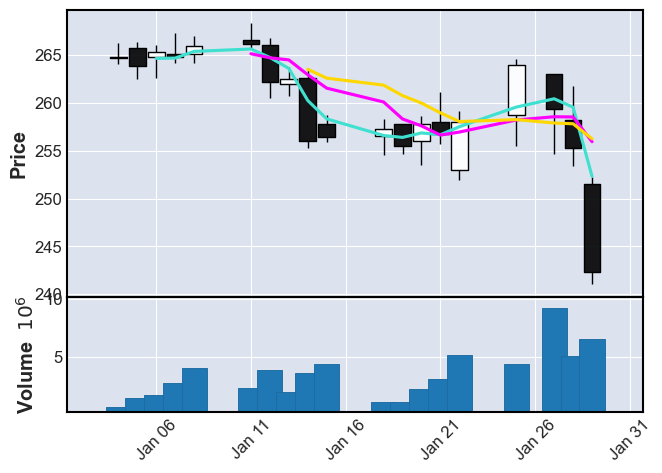

In [25]:
mpf.plot(df['2010-01'],type='candle',mav=(3,6,9),volume=True,show_nontrading=True)